In [1]:
#import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1. Data Preparation

## Import data

In [2]:
#load dataframe
df = pd.read_pickle('data/album_df.pkl')

In [3]:
df.head()

,album_run_time_ms,number_of_tracks,energy_mean,speechiness_mean,danceability_mean,acousticness_mean,instrumentalness_mean,loudness_mean,liveness_mean,valence_mean,energy_amax,liveness_amax,speechiness_amax,valence_amax,tempo_amax,time_signature_amax,popularity_amax,score_amax,num_markets_amax,is_explicit_amax,mode_amax,key_amax,instrumentalness_amax,acousticness_amax,loudness_amax,danceability_amax,Genres
00S6tD68T69Opox43fMWAJ,2593940.0,10.0,0.229250,0.082110,0.546800,0.736810,0.738900,-12.205700,0.127010,0.345000,0.469,0.321,0.2080,0.891,148.895,4.0,6.0,8.0,79.0,False,1.0,7.0,0.9430,0.992,-8.016,0.699,Jazz
00ojDEHvnEOPOjhHrUrKy5,2886000.0,10.0,0.384600,0.094240,0.724300,0.374767,0.532800,-15.015700,0.200730,0.362970,0.697,0.896,0.1460,0.874,120.006,4.0,7.0,7.4,79.0,False,1.0,11.0,0.8460,0.854,-11.375,0.918,Electronic
00oz3t7cI3WfwS2oEIZD6x,1670290.0,9.0,0.174333,0.037156,0.443889,0.957778,0.205918,-13.239333,0.114111,0.214989,0.268,0.161,0.0512,0.342,207.893,5.0,45.0,8.4,1.0,False,1.0,11.0,0.9610,0.992,-11.023,0.583,Folk/Country
00uqjqwLruO346z3cNlNqG,2337540.0,13.0,0.601769,0.084700,0.562154,0.464462,0.011059,-6.111769,0.148254,0.455692,0.911,0.570,0.2120,0.782,203.911,4.0,65.0,7.4,79.0,False,1.0,11.0,0.0504,0.934,-3.046,0.714,Pop/R&B
011h71h7y7Via9wSsfZtQA,2249943.0,10.0,0.591300,0.079200,0.459100,0.492267,0.144140,-9.282200,0.194600,0.335260,0.863,0.350,0.3670,0.571,151.984,5.0,21.0,7.3,72.0,False,1.0,11.0,0.7180,0.800,-5.051,0.625,Rock


As mentioned during the EDA, I'll focus modeling on Rock music for consistency and run separate models for mean set and max set.

In [4]:
rock_df = df.loc[df['Genres'] == 'Rock']

In [5]:
df.columns

Index(['album_run_time_ms', 'number_of_tracks', 'energy_mean',
       'speechiness_mean', 'danceability_mean', 'acousticness_mean',
       'instrumentalness_mean', 'loudness_mean', 'liveness_mean',
       'valence_mean', 'energy_amax', 'liveness_amax', 'speechiness_amax',
       'valence_amax', 'tempo_amax', 'time_signature_amax', 'popularity_amax',
       'score_amax', 'num_markets_amax', 'is_explicit_amax', 'mode_amax',
       'key_amax', 'instrumentalness_amax', 'acousticness_amax',
       'loudness_amax', 'danceability_amax', 'Genres'],
      dtype='object')

I've decided to use the following variables as predictors:
* Speechiness
* Danceability
* Acousticness
* Valence
* Liveness
* Instrumentalness

Other variables such as tempo, mode and key are deliberately excluded to avoid suggesting an overly formulaic approach in song making, since a repetitive album is a guaranteed failure. The values chosen will instead point towards more general characteristics while giving musicians greater artistic freedom.

In [6]:
df_mean = rock_df[['energy_mean', 'speechiness_mean', 'danceability_mean', 'acousticness_mean',
       'instrumentalness_mean', 'loudness_mean', 'liveness_mean', 'valence_mean', 'score_amax']]

In [7]:
df_max = rock_df[['energy_amax', 'liveness_amax', 'speechiness_amax','valence_amax',
                  'tempo_amax', 'popularity_amax', 'instrumentalness_amax', 'acousticness_amax',
                  'loudness_amax', 'danceability_amax','score_amax']]

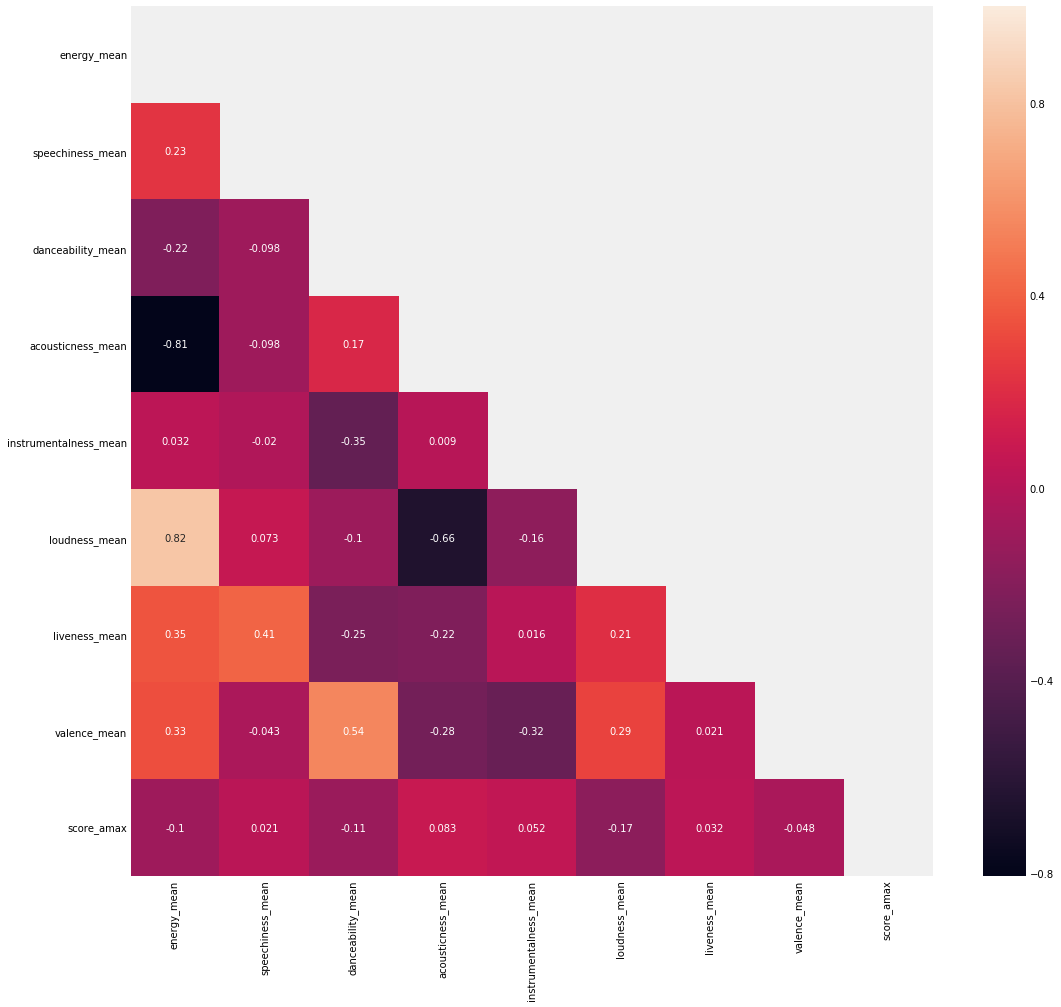

In [8]:

# checking multicolinearity between mean features
corr = df_mean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True, mask=mask)
plt.autoscale()
plt.show()

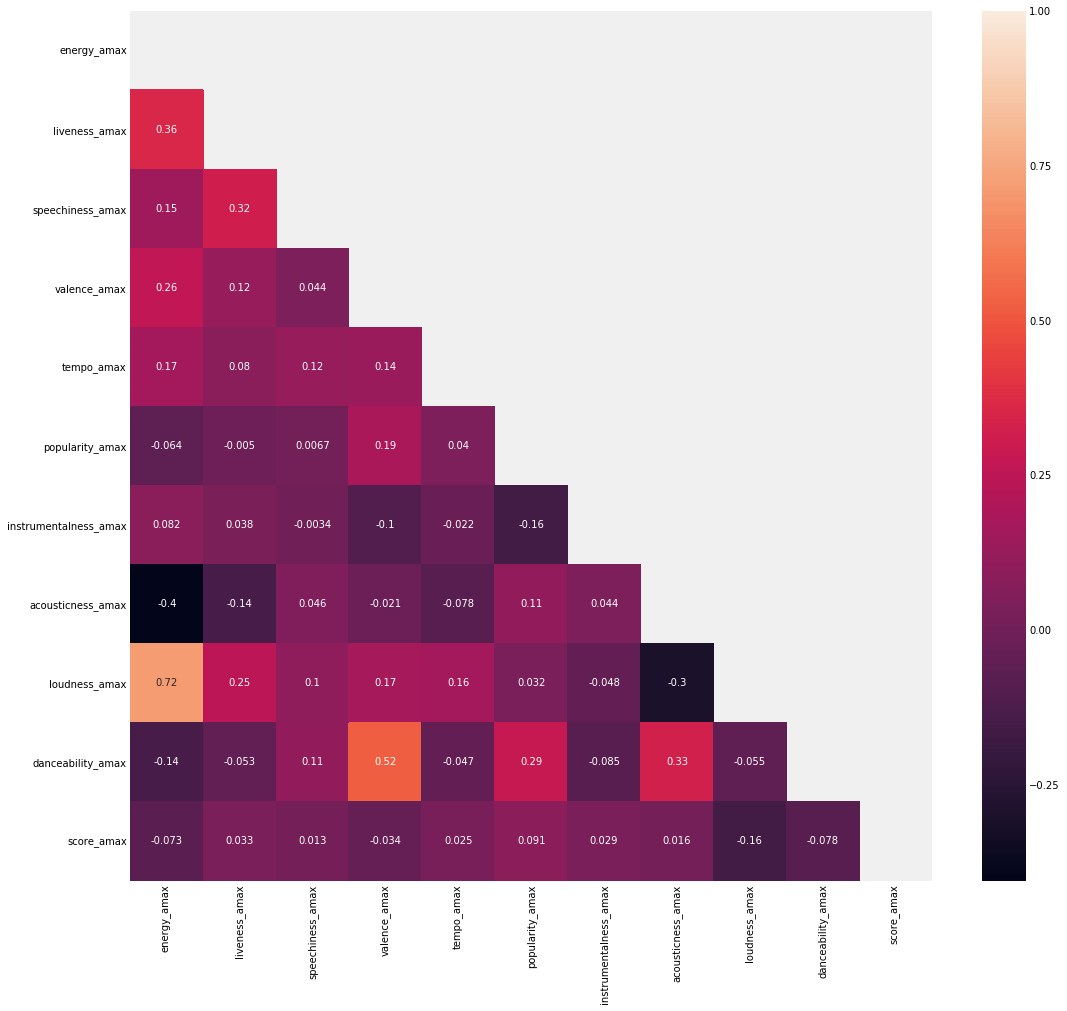

In [9]:
# checking multicolinearity between max features
corr = df_max.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True, mask=mask)
plt.autoscale()
plt.show()

In [10]:
# choosing dependent and independent variables. Energy has high colinearity in both mean and max set,
# so it will be discarded
X_mean = rock_df[['speechiness_mean', 'danceability_mean', 'acousticness_mean',
       'instrumentalness_mean', 'liveness_mean', 'valence_mean']]
X_max = rock_df[['liveness_amax', 'speechiness_amax','valence_amax',
                 'instrumentalness_amax', 'acousticness_amax', 
                 'danceability_amax']]
y = rock_df[['score_amax']]

In [11]:
# splitting in train and test
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y, test_size = 0.20, random_state = 64)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y, test_size = 0.20, random_state = 64)

In [12]:
# splitting in train and validation
X_train_mean_v, X_val_mean, y_train_mean_v, y_val_mean = train_test_split(X_train_mean, y_train_mean, test_size = 0.20, random_state = 64)
X_train_max_v, X_val_max, y_train_max_v, y_val_max = train_test_split(X_train_max, y_train_max, test_size = 0.20, random_state = 64)

## Baseline Model: Linear Regression

In [13]:
# instantiate the model
lin_reg = LinearRegression()

# fit the model to mean
lin_reg_mean = lin_reg.fit(X_train_mean_v, y_train_mean_v)

In [14]:
print(f'R^2 for training mean set: {lin_reg_mean.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {lin_reg_mean.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.02349857247066145
R^2 for validation mean set: 0.012706543406271864


In [15]:
# fit the model to max
lin_reg_max = lin_reg.fit(X_train_max_v, y_train_max_v)

In [16]:
print(f'R^2 for training mean set: {lin_reg_max.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {lin_reg_max.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.012819709654594004
R^2 for validation mean set: -0.005027961142106463


Mean set performs better than max set but the values are still quite low.

## Ridge Regression

In [17]:
# instantiate the model
ridge = Ridge()

In [18]:
# fit the model to mean
ridge_mean = ridge.fit(X_train_mean_v, y_train_mean_v)

In [19]:
print(f'R^2 for training mean set: {ridge_mean.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {ridge_mean.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.022372995876253854
R^2 for validation mean set: 0.014120697228876544


In [20]:
# fit the model to max
ridge_max = ridge.fit(X_train_max_v, y_train_max_v)

In [21]:
print(f'R^2 for training mean set: {ridge_max.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {ridge_max.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.01265625344829624
R^2 for validation mean set: -0.004735245311732195


Ridge unoptimized is yielding almost the same results as linear regression, but we'll try to optimize some parameters through GridSearchCV

### Parameter Optimization

In [22]:
# optimizing alpha for mean set

alpha = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100, 1000]
param_grid = dict(alpha=alpha)

grid_mean = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid_mean.fit(X_train_mean_v, y_train_mean_v)
#grid_result_mean = grid.fit(X_train_mean_v, y_train_mean_v)

print('Best Score: ', grid_mean.best_score_)
print('Best Params: ', grid_mean.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.004598770479330174
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    4.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    4.2s finished


In [23]:
# optimizing alpha for max set

alpha = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100, 1000]
param_grid = dict(alpha=alpha)

grid_max = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid_max.fit(X_train_max_v, y_train_max_v)

print('Best Score: ', grid_max.best_score_)
print('Best Params: ', grid_max.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 11 candidates, totalling 33 fits
Best Score:  -0.006833259247992036
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished


In [24]:
ridge_mean_opt = grid_mean.best_estimator_

In [25]:
print(f'R^2 for training mean set: {ridge_mean_opt.score(X_train_mean_v, y_train_mean_v)}')
print(f'R^2 for validation mean set: {ridge_mean_opt.score(X_val_mean, y_val_mean)}')

R^2 for training mean set: 0.022372995876253854
R^2 for validation mean set: 0.014120697228876544


In [26]:
ridge_max_opt = grid_max.best_estimator_

In [27]:
print(f'R^2 for training mean set: {ridge_max_opt.score(X_train_max_v, y_train_max_v)}')
print(f'R^2 for validation mean set: {ridge_max_opt.score(X_val_max, y_val_max)}')

R^2 for training mean set: 0.009543787771691847
R^2 for validation mean set: -0.005366338807802462


## Model Selection and Final Test

Optimized ridge regression performed slightly better compared to regular linear regression. Negative values can probably be explained by a relativley small pool for the validation target, but were still mitigated by the optimization.

### Mean features test

In [30]:
test_r_squared_mean = ridge_mean_opt.score(X_test_mean, y_test_mean)

y_pred_test_mean = ridge_mean_opt.predict(X_test_mean)
test_mse_mean = np.sqrt(mean_squared_error(y_test_mean, y_pred_test_mean))

print(f'Test r^2: {test_r_squared_mean} \nTest MSE: {test_mse_mean}')

Test r^2: 0.05487737620785704 
Test MSE: 0.8398635339080691


In [34]:
initial_score_r_mean = ridge_mean_opt.score(X_train_mean_v, y_train_mean_v)
print('The initial R-Squared value for the ridge model is:', initial_score_r_mean.round(4))

X_train_v_predidct_ridge_mean = ridge_mean_opt.predict(X_train_mean_v)

mse_mean = mean_squared_error(y_train_mean_v, X_train_v_predidct_ridge_mean)
print('The Mean Squared Error value for the ridge model is:', mse_mean.round(4))

mae_mean = mean_absolute_error(y_train_mean_v, X_train_v_predidct_ridge_mean)
print('The Mean Absolute Error value for the ridge model is:', mae_mean.round(4))

The initial R-Squared value for the ridge model is: 0.0224
The Mean Squared Error value for the ridge model is: 0.9744
The Mean Absolute Error value for the ridge model is: 0.7221


In [35]:
#final model intialisation
ridge_test_mean = ridge_mean_opt.score(X_test_mean, y_test_mean)
ridge_test_mean

0.05487737620785704

In [36]:
ridge_mean_opt.coef_

array([[ 0.456066  , -1.13231604,  0.40811014,  0.07262665, -0.02614624,
         0.36660394]])

Text(0, 0.5, 'Feature')

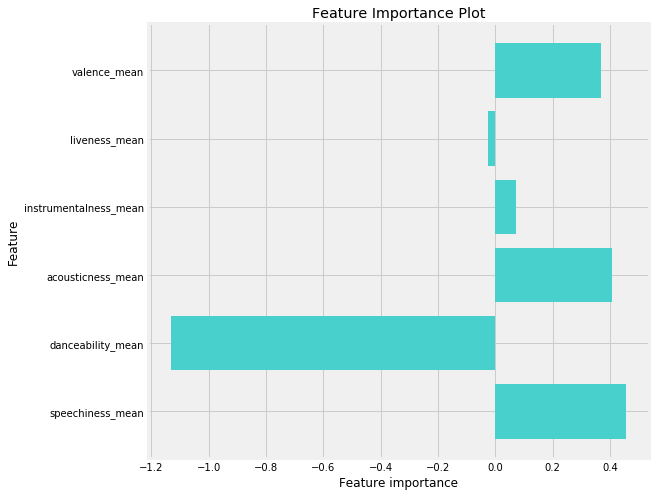

In [37]:
test_mean_coeffs = [0.456066, -1.13231604, 0.40811014, 0.07262665, -0.02614624, 0.36660394]

#determine feature importances
n_features = X_train_mean.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), test_mean_coeffs, align='center', color='mediumturquoise')
plt.title('Feature Importance Plot')
plt.yticks(np.arange(n_features), X_train_mean.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

### Max features test

In [38]:
test_r_squared_max = ridge_max_opt.score(X_test_max, y_test_max)

y_pred_test_max = ridge_mean_opt.predict(X_test_max)
test_mse_max = np.sqrt(mean_squared_error(y_test_max, y_pred_test_max))

print(f'Test r^2: {test_r_squared_max} \nTest MSE: {test_mse_max}')

Test r^2: 0.0025382463768389707 
Test MSE: 1.203194379920142


In [40]:
initial_score_r_max = ridge_max_opt.score(X_train_max_v, y_train_max_v)
print('The initial R-Squared value for the ridge model is:', initial_score_r_max.round(4))

X_train_v_predidct_ridge_max = ridge_max_opt.predict(X_train_max_v)

mse_max = mean_squared_error(y_train_max_v, X_train_v_predidct_ridge_max)
print('The Mean Squared Error value for the ridge model is:', mse_max.round(4))

mae_max = mean_absolute_error(y_train_max_v, X_train_v_predidct_ridge_max)
print('The Mean Absolute Error value for the ridge model is:', mae_max.round(4))

The initial R-Squared value for the ridge model is: 0.0095
The Mean Squared Error value for the ridge model is: 0.9871
The Mean Absolute Error value for the ridge model is: 0.7275


In [41]:
#final model intialisation
ridge_test_max = ridge_max_opt.score(X_test_max, y_test_max)
ridge_test_max

0.0025382463768389707

In [42]:
ridge_max_opt.coef_

array([[ 0.07522784,  0.15867429,  0.02232201,  0.10646334,  0.01088425,
        -0.35632282]])

Text(0, 0.5, 'Feature')

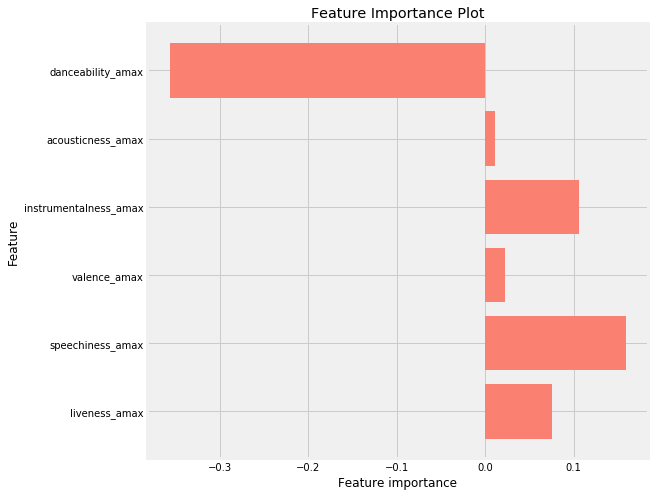

In [43]:
test_max_coeffs = [ 0.07522784,  0.15867429,  0.02232201,  0.10646334,  0.01088425, -0.35632282]
#determine feature importances
n_features = X_train_max.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), test_max_coeffs, align='center', color='salmon')
plt.title('Feature Importance Plot')
plt.yticks(np.arange(n_features), X_train_max.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

# Conclusions

The resulting r2 is relatively low, but we're still able to see which features influence the most a critic's score. Definitely don't make your album too danceable and focus a little more on lyricism. There's a bit of inconsistency with valence and acousticness between values: while the album should be overall positive and with acoustic instruments, it seems it doesn't influence a lot the individual songs. It's also worth noting that Max features have a significantly smaller influence than mean values.

### Further Developments 

As it stands, we don't have enough points of reference to see if the model actually reflects the trends of the genres it's fitted on. I simply advise gathering enough data to create more models to fit on different genres.